In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette("Set1")
sns.set_context('talk')

# Visualise Different Surprise Measures

In [14]:
def predictive_surprise(p):
    return -np.log(p)

def bayesian_surprise(p, q):
    # Computes the KL divergence between two binary categorical distributions (i.e. Bernoulli!)
    # p, q are both the probabilities asigned to y=1
    return p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q)) 

def KL_Gaussian():
    return

In [15]:
np.log(1)

0.0

In [16]:
p = np.linspace(0+1e-4, 1-1e-4, 100)
ps = predictive_surprise(p)

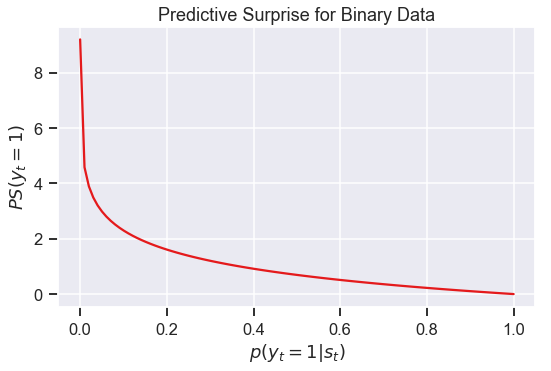

In [17]:
plt.plot(p, ps)
plt.xlabel(r"$p(y_t=1 | s_t)$")
plt.ylabel(r"$PS(y_t = 1)$")
plt.title("Predictive Surprise for Binary Data")
plt.tight_layout()
plt.savefig("figures/predictive_surprise.png", dpi=300)

In [18]:
p = np.linspace(0.01, 0.99, 100)
q = np.linspace(0.01, 0.99, 100)
P, Q = np.meshgrid(p, q) # grid of point
bs = bayesian_surprise(P, Q) # evaluation of the function on the grid


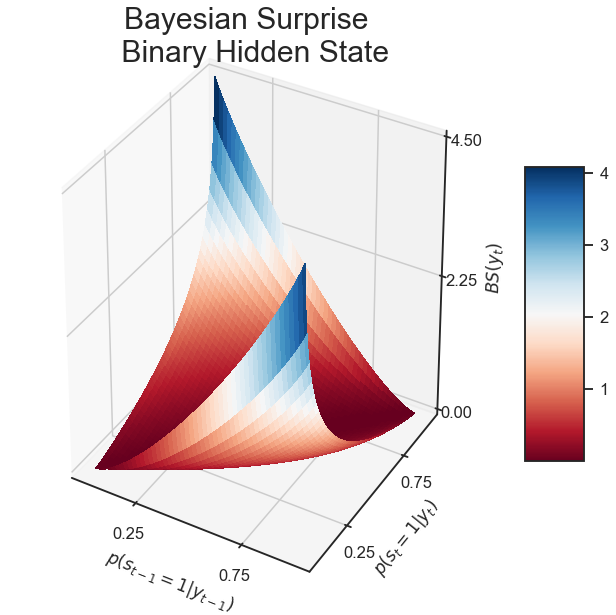

In [68]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
sns.set_style("white")

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(P, Q, bs, rstride=2, cstride=2, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

majors = [0.25, 0.75]
ax.zaxis.set_major_locator(LinearLocator(3))
ax.xaxis.set_major_locator(FixedLocator(majors))
ax.yaxis.set_major_locator(FixedLocator(majors))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Bayesian Surprise \n Binary Hidden State", fontsize=30)
ax.set_zlabel(r"$BS(y_t)$", fontsize=17)
ax.set_xlabel(r"$p(s_{t-1}=1|y_{t-1})$", fontsize=17)
ax.set_ylabel(r"$p(s_{t}=1|y_{t})$", fontsize=17)
ax.yaxis.labelpad=15
ax.xaxis.labelpad=15
ax.zaxis.labelpad=20

plt.tight_layout()
plt.savefig("figures/bayesian_surprise.png", dpi=300)